In [1]:
import pandas as pd


In [2]:
import talib

In [3]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\AMZN.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


            Close    High     Low    Open     Volume
Date                                                
2009-01-02  2.718  2.7265  2.5535  2.5675  145928000
2009-01-05  2.703  2.7870  2.6515  2.7865  190196000
2009-01-06  2.868  2.9110  2.6875  2.7275  221602000
2009-01-07  2.810  2.8475  2.7675  2.8145  158854000
2009-01-08  2.858  2.8660  2.7290  2.7495  131558000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


Calculate Technical Indicators with TA-Lib

In [4]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  153.419998  154.350006  152.710007  153.770004  29514100   
2023-12-26  153.410004  153.979996  153.029999  153.559998  25067200   
2023-12-27  153.339996  154.779999  153.119995  153.559998  31434700   
2023-12-28  153.380005  154.080002  152.949997  153.720001  27057000   
2023-12-29  151.940002  153.889999  151.029999  153.100006  39823200   

                SMA_20      EMA_20     RSI_14      MACD  MACD_signal  \
Date                                                                   
2023-12-22  148.578999  148.860492  64.115558  3.135958     2.873052   
2023-12-26  148.863000  149.293779  64.085644  3.118650     2.922172   
2023-12-27  149.178500  149.679133  63.860893  3.063965     2.950530   
2023-12-28  149.531499  150.031597  63.938728  2.989395     2.958303   
2023-12-29  149.824000  150.213350  59.012257  2.782032     2.9

Visualize the Data

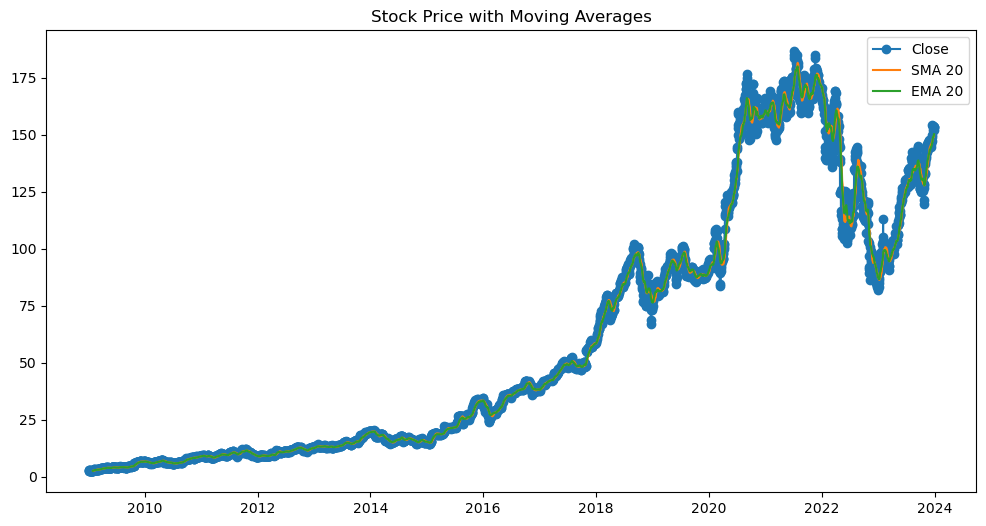

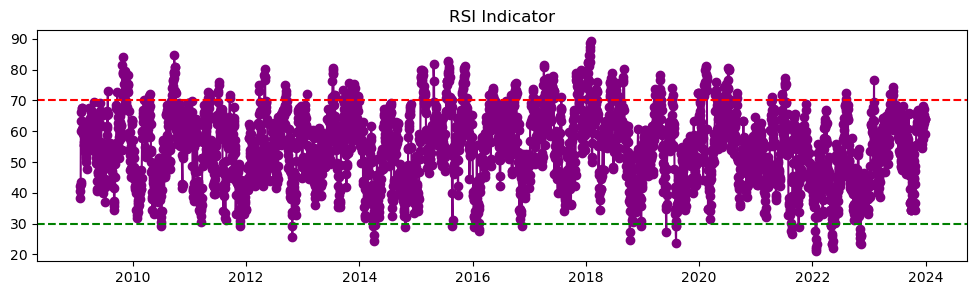

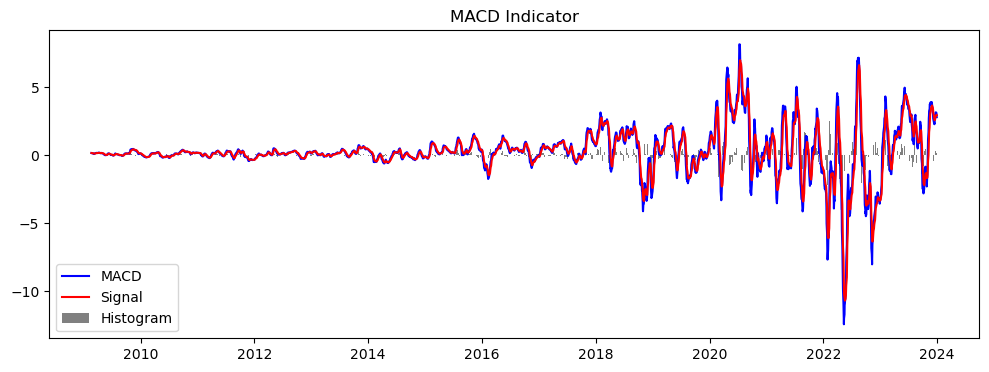

In [5]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
